In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Mounted at /content/drive
drive  sample_data
/content
done


In [ ]:
cd "/content/drive/My Drive/UIA/RegressionModel/"

/content/drive/My Drive/UIA/RegressionModel


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
old=pd.read_csv("/content/drive/My Drive/UIA/RegressionModel/Training766.csv",index_col=0)
new=pd.read_csv("/content/drive/My Drive/UIA/RegressionModel/CombinedBatches.csv",index_col=0)

In [ ]:
old.head()

,Convincing1,Severity1,body,Severity2,Convincing2,Convincing,Severity
0,1,1,Tracks down and removes spying thingies to mak...,3,1,1.0,2.0
1,1,1,My account is no longer allowing me to log in....,1,3,2.0,1.0
2,1,1,This gives me all the updates and info to keep...,3,2,1.5,2.0
3,4,4,I think the update is great. The only people c...,3,4,4.0,3.5
4,5,5,"Because of this, now my overly obsessive and t...",3,2,3.5,4.0


In [ ]:
old.rename(columns={'Convincing':'Convincingness'},inplace=True)

In [ ]:
trainingdata=pd.concat([old[['body','Convincingness','Severity']],new],axis=0)

In [ ]:
#### In case of duplicates, retaining the old annotations
trainingdata=trainingdata.drop_duplicates(['body'],keep='first')

In [ ]:
from scipy.stats.mstats import gmean 

trainingdata['Alarmingness']=gmean(trainingdata[['Convincingness','Severity']],axis=1)

In [ ]:
trainingdata.reset_index(drop=True,inplace=True)

In [ ]:
trainingdata.loc[4,'body']

'Because of this, now my overly obsessive and tracking dad is now tracking everything I do. He’s probably watching me write this from my screen right now. Thanks, Verizon, for enabling him to stalk me!'

In [ ]:
trainingdata.tail()

,body,Convincingness,Severity,Alarmingness
1880,Three kids in college always driving home...th...,2.5,2.0,2.236068
1881,Ever wonder why your BF/GF knows who you're ta...,4.0,3.0,3.464102
1882,Nothing wrong with the app but my dad uses it ...,4.0,5.0,4.472136
1883,Gives me safety of mind. It's not stalking ou...,2.0,3.0,2.449490
1884,LOTSSS of spam/porn messages... Never any matc...,3.0,3.5,3.240370


In [ ]:
trainingdata.to_csv("TrainingData1885.csv")

In [ ]:
pwd

'/content/drive/My Drive/UIA/RegressionModel'

In [ ]:
trainingdata=pd.read_csv("TrainingData1885.csv",index_col=0)

In [ ]:
trainingdata.head()

,body,Convincingness,Severity,Alarmingness
0,Tracks down and removes spying thingies to mak...,1.0,2.0,1.414214
1,My account is no longer allowing me to log in....,2.0,1.0,1.414214
2,This gives me all the updates and info to keep...,1.5,2.0,1.732051
3,I think the update is great. The only people c...,4.0,3.5,3.741657
4,"Because of this, now my overly obsessive and t...",3.5,4.0,3.741657


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
import re

In [ ]:
def preprocessing(df):
    corpus=[]
    for i in df.index:
        # print(i)
        temp=df.loc[i,'body']
        temp=str(temp).lower()
        temp=temp.translate(temp.maketrans(dict.fromkeys(string.punctuation))) ### deletes all punctuation marks
        for word in stop_words:   
            temp=temp.replace(" "+word+" ", " ") ### deletes all stop words
        temp=re.sub('[^A-Za-z0-9]+', " ",temp) ### deletes all special characters

        temp=temp.replace("39","'") ###
        temp=temp.replace("spy","") ### replace spy keyword
        temp=temp.replace("stealth","") ### replace stealth keyword
        temp=temp.replace("stalk","") ### replace stalk keyword
        temp=temp.replace("descried","") ### replace descried keyword
        temp=temp.replace("descry","") ### replace descried keyword
        temp=temp.replace("descring","") ### replace descried keyword
#             print(word)
        corpus.append(temp)
    return corpus

In [ ]:
corpus=preprocessing(trainingdata)

In [ ]:
corpus

In [ ]:
corpus[4]

'because overly obsessive tracking dad tracking everything he s probably watching write screen right thanks verizon enabling  me'

In [ ]:
corpus

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embedding(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
train_embeddings=embedding(corpus)

In [ ]:
train_embeddings.shape

TensorShape([1885, 512])

**Cross Validation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
train_embeddings[:,:]

<tf.Tensor: shape=(1885, 512), dtype=float32, numpy=
array([[-0.03553457,  0.05893938,  0.03745116, ...,  0.01750809,
        -0.00423342,  0.0319073 ],
       [-0.06498113, -0.05549376, -0.04357297, ..., -0.02272099,
        -0.03486535, -0.00746717],
       [ 0.04543777, -0.04593014, -0.03301333, ...,  0.01658818,
        -0.06685699, -0.00232341],
       ...,
       [ 0.06662058, -0.0051486 , -0.0192322 , ..., -0.01463544,
        -0.06076517, -0.01988637],
       [ 0.04887816,  0.06451866, -0.05004798, ...,  0.01236128,
         0.01389412,  0.00688787],
       [-0.04891145, -0.07606211, -0.01825978, ..., -0.02084809,
        -0.06567057, -0.00474388]], dtype=float32)>

In [ ]:
train_embeddings[0]
features=pd.DataFrame(data=train_embeddings)

In [ ]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,"tf.Tensor(-0.03553458, shape=(), dtype=float32)","tf.Tensor(0.058939368, shape=(), dtype=float32)","tf.Tensor(0.037451148, shape=(), dtype=float32)","tf.Tensor(-0.004712745, shape=(), dtype=float32)","tf.Tensor(0.01585087, shape=(), dtype=float32)","tf.Tensor(0.016066272, shape=(), dtype=float32)","tf.Tensor(0.03074686, shape=(), dtype=float32)","tf.Tensor(-0.03582275, shape=(), dtype=float32)","tf.Tensor(-0.05640653, shape=(), dtype=float32)","tf.Tensor(0.024126712, shape=(), dtype=float32)","tf.Tensor(-0.023375059, shape=(), dtype=float32)","tf.Tensor(0.04694177, shape=(), dtype=float32)","tf.Tensor(0.03314613, shape=(), dtype=float32)","tf.Tensor(-0.06494035, shape=(), dtype=float32)","tf.Tensor(0.003958697, shape=(), dtype=float32)","tf.Tensor(0.029049871, shape=(), dtype=float32)","tf.Tensor(-0.029588712, shape=(), dtype=float32)","tf.Tensor(0.04266381, shape=(), dtype=float32)","tf.Tensor(-0.05336973, shape=(), dtype=float32)","tf.Tensor(0.019900953, shape=(), dtype=float32)","tf.Tensor(-0.051674575, shape=(), dtype=float32)","tf.Tensor(0.044226624, shape=(), dtype=float32)","tf.Tensor(-0.024065632, shape=(), dtype=float32)","tf.Tensor(-0.0472203, shape=(), dtype=float32)","tf.Tensor(-0.029099058, shape=(), dtype=float32)","tf.Tensor(-0.007105094, shape=(), dtype=float32)","tf.Tensor(-0.02059035, shape=(), dtype=float32)","tf.Tensor(0.037185855, shape=(), dtype=float32)","tf.Tensor(0.027870152, shape=(), dtype=float32)","tf.Tensor(0.07820801, shape=(), dtype=float32)","tf.Tensor(-0.03876926, shape=(), dtype=float32)","tf.Tensor(0.041241035, shape=(), dtype=float32)","tf.Tensor(-0.0665144, shape=(), dtype=float32)","tf.Tensor(-0.031042308, shape=(), dtype=float32)","tf.Tensor(-0.0013989749, shape=(), dtype=float32)","tf.Tensor(-0.013812332, shape=(), dtype=float32)","tf.Tensor(-0.06843146, shape=(), dtype=float32)","tf.Tensor(0.030994395, shape=(), dtype=float32)","tf.Tensor(0.027507117, shape=(), dtype=float32)","tf.Tensor(0.043849356, shape=(), dtype=float32)",...,"tf.Tensor(-0.061164003, shape=(), dtype=float32)","tf.Tensor(-0.0295068, shape=(), dtype=float32)","tf.Tensor(0.005611431, shape=(), dtype=float32)","tf.Tensor(0.085818455, shape=(), dtype=float32)","tf.Tensor(-0.026229324, shape=(), dtype=float32)","tf.Tensor(-0.027659109, shape=(), dtype=float32)","tf.Tensor(-0.033696096, shape=(), dtype=float32)","tf.Tensor(0.0132474955, shape=(), dtype=float32)","tf.Tensor(-0.05533965, shape=(), dtype=float32)","tf.Tensor(0.03181803, shape=(), dtype=float32)","tf.Tensor(0.015664805, shape=(), dtype=float32)","tf.Tensor(-0.021554029, shape=(), dtype=float32)","tf.Tensor(-0.02096535, shape=(), dtype=float32)","tf.Tensor(-0.075448684, shape=(), dtype=float32)","tf.Tensor(0.06173844, shape=(), dtype=float32)","tf.Tensor(-0.02670058, shape=(), dtype=float32)","tf.Tensor(0.04046661, shape=(), dtype=float32)","tf.Tensor(0.03316828, shape=(), dtype=float32)","tf.Tensor(0.0058912393, shape=(), dtype=float32)","tf.Tensor(0.04563167, shape=(), dtype=float32)","tf.Tensor(0.020740613, shape=(), dtype=float32)","tf.Tensor(0.06511935, shape=(), dtype=float32)","tf.Tensor(0.020292599, shape=(), dtype=float32)","tf.Tensor(0.035846714, shape=(), dtype=float32)","tf.Tensor(0.09654216, shape=(), dtype=float32)","tf.Tensor(0.040506907, shape=(), dtype=float32)","tf.Tensor(-0.02699354, shape=(), dtype=float32)","tf.Tensor(-0.005735202, shape=(), dtype=float32)","tf.Tensor(-0.058021426, shape=(), dtype=float32)","tf.Tensor(0.064903945, shape=(), dtype=float32)","tf.Tensor(0.029074198, shape=(), dtype=float32)","tf.Tensor(0.007737781, shape=(), dtype=float32)","tf.Tensor(0.050804812, shape=(), dtype=float32)","tf.Tensor(0.045109946, shape=(), dtype=float32)","tf.Tensor(-0.

In [ ]:

from sklearn.model_selection import cross_val_score

from numpy import absolute
from numpy import mean
from numpy import std


In [ ]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [ ]:


####SVR Multi-output model with cross validation
svr = SVR()
###
wrapper = MultiOutputRegressor(svr)
n_scores1=cross_val_score(wrapper, features, trainingdata.loc[:,"Convincingness":"Severity"], scoring='neg_mean_squared_error', cv=10)
print(n_scores1)
n_scores = absolute(n_scores1)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)


[        nan -0.83724243 -0.93129094 -1.16269978 -0.55405467 -0.51952862
 -0.59691374 -0.53696544 -0.54183057 -1.40598294]
MAE: nan (nan)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

####DT Multi-output model with cross validation
dt = DecisionTreeRegressor()
n_scores=cross_val_score(dt, features,trainingdata.loc[:,'Convincingness':'Severity'], cv=10,scoring='neg_mean_squared_error')
print(n_scores)
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


[-2.03115814 -1.81944444 -1.8318085  -2.23346561 -1.38813566 -1.275543
 -1.65946365 -1.49914118 -1.57396941 -2.19195109]
MAE: 1.750 (0.313)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
n_scores=cross_val_score(rf, features,trainingdata.loc[:,'Convincingness':'Severity'], cv=10,scoring='neg_mean_squared_error')
print(n_scores)
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


[-0.84904421 -0.7701564  -0.86375508 -1.16349936 -0.64900431 -0.61592925
 -0.68543357 -0.74222318 -0.75898756 -1.50838428]
MAE: 0.861 (0.261)


**Hyper-parameter Tuning of SVR**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe_svr = MultiOutputRegressor(SVR())

# grid_param_svr = {
#     'estimator__C': [0.1,1,10,100],
#     'estimator__gamma': [0.1,1,10,100],
#      'estimator__kernel': ['rbf','linear']
# }

tuned_parameters = [{'estimator__kernel': ['rbf'], 'estimator__gamma': [1e-2,1e-3, 1e-4,1e-5],
                     'estimator__C': [1, 10, 100, 1000]},
                    {'estimator__kernel': ['linear'], 'estimator__C': [1, 10, 100, 1000]}]

from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

gs_svr = (GridSearchCV(estimator=pipe_svr, 
                      param_grid=tuned_parameters, 
                      cv=10,
                      scoring = scorer,
                      n_jobs = -1))

gs_svr = gs_svr.fit(features,trainingdata.loc[:,'Convincingness':'Severity'])
gs_svr.best_estimator_ 

MultiOutputRegressor(estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma=0.01, kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False),
                     n_jobs=None)

In [ ]:
pipe_svr.get_params().keys()

dict_keys(['estimator__C', 'estimator__cache_size', 'estimator__coef0', 'estimator__degree', 'estimator__epsilon', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

In [ ]:
train_embeddings=embedding(corpus)

In [ ]:
#### BEST TUNED MODEL
from sklearn.svm import SVR

tuned_model = MultiOutputRegressor(SVR(C=10,gamma=0.01,kernel='rbf'))

tuned_model.fit(features,trainingdata.loc[:,'Convincingness':'Severity'])

MultiOutputRegressor(estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma=0.01, kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False),
                     n_jobs=None)

**Plot Regression Line**

In [ ]:
trainingdata.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884],
           dtype='int64', length=1885)

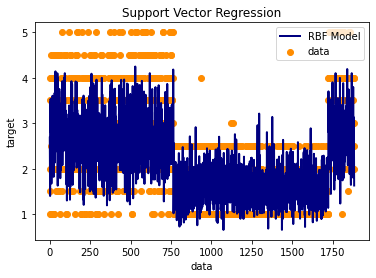

In [ ]:
import matplotlib
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt



#Fit regression model
Y = tuned_model.predict(features)
# Y[0] = Y[:,0]
# y_poly = svr_poly.fit(x,y).predict(x)

#Plotting of results
lw = 2

plt.scatter(trainingdata.index, trainingdata.loc[:,'Convincingness'], color="darkorange", label="data")
plt.plot(trainingdata.index, Y[:,0], color="navy", lw=lw, label="RBF Model")
# plt.plot(x, y_lin, color="c", lw=lw, label="Linear Model")
# plt.plot(x, y_poly, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

**Regression line Ends**

In [ ]:
def test_preprocessing(df):
    corpus=[]
    for i in df.index:
        # print(i)
        temp=df.loc[i,'body']
        temp=str(temp).lower()
        temp=temp.translate(temp.maketrans(dict.fromkeys(string.punctuation))) ### deletes all punctuation marks
        for word in stop_words:   
            temp=temp.replace(" "+word+" ", " ") ### deletes all stop words
        temp=re.sub('[^A-Za-z0-9]+', " ",temp) ### deletes all special characters

        temp=temp.replace("39","'") ###
        corpus.append(temp)
    return corpus

In [ ]:
pos_data=pd.read_csv("Data_spy_stalk_stealth.csv",index_col=0)

In [ ]:
corpus_test1=test_preprocessing(pos_data)

In [ ]:
test_embeddings=embedding(corpus_test1)

In [ ]:
Predictions=tuned_model.predict(test_embeddings)
# pos_data['Convincingness'],pos_data['Severity']=Predictions[;,0],Predictions[;,1]

In [ ]:
pos_data['Convincingness'],pos_data['Severity']=Predictions[:,0],Predictions[:,1]

In [ ]:
pos_data

In [ ]:
del pos_data['pred_alarmingness']
del pos_data['pred_alarmingness2']

In [ ]:
from scipy.stats.mstats import gmean
pos_data['pred_alarmingness']=gmean(pos_data[['Convincingness','Severity']],axis=1)

In [ ]:
pos_data.to_csv("Data_spy_stalk_stealth.csv")

In [ ]:
import pickle

In [ ]:
### Save Model
filename = 'USE_tuned_model.sav'
pickle.dump(tuned_model, open(filename, 'wb'))

In [ ]:
filename = 'USE_tuned_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

**Test on clean cases**

In [ ]:
test=pd.read_csv("/content/drive/My Drive/UIA/RegressionModel/TestNegativeRandom.csv",index_col=0)

In [ ]:
test.head()

,recordID,reviewID,appID,timestamp,rating,name,title,body,pred_alarmingness,ner_org
0,1,2859157422,1173434375,2018-07-07T21:28:04Z,1,Mindizzle 1985,Thumbs down,It’s doesn’t always locate the person your tra...,1.890126,[]
1,2,5366390210,380395093,2020-01-06T01:59:24Z,5,blalor,Still working great after all these years,"This is a fairly simple app, but it works well...",1.873841,[]
2,3,5224084763,380395093,2019-12-02T08:42:24Z,5,thecheatah,Love the update!,Love the animated path!,1.081646,[]
3,4,2154992309,380395093,2018-02-01T22:11:57Z,5,Clearwave,Great App,Great App love it,1.670403,[]
4,5,1836278830,380395093,2017-10-09T02:40:09Z,1,Victoria06220622,Love the App. Support is NON EXISTENT!,ZERO customer service. All I needed to do was ...,1.287744,[]


In [ ]:
negative_test=test_preprocessing(test)

In [ ]:
negative_test_embeddings=embedding(negative_test)

In [ ]:
NegativePred=tuned_model.predict(negative_test_embeddings)
test['Convincingness'],test['Severity']=NegativePred[:,0],NegativePred[:,1]

In [ ]:
from scipy.stats.mstats import gmean
test['pred_alarmingness2']=gmean(test[['Convincingness','Severity']],axis=1)

In [ ]:
test.to_csv("/content/drive/My Drive/UIA/RegressionModel/TestNegativeRandom.csv")

**Testing on GovtSpy**

In [ ]:
govt=pd.read_csv("/content/drive/My Drive/UIA/GovtSpy.csv",index_col=0)

In [ ]:
govt_test=test_preprocessing(govt)

In [ ]:
govt_test_embeddings=embedding(govt_test)

In [ ]:
GovtPred=tuned_model.predict(govt_test_embeddings)
govt['Convincingness'],govt['Severity']=GovtPred[:,0],GovtPred[:,1]

In [ ]:
govt.columns

Index(['recordID', 'reviewID', 'appID', 'timestamp', 'rating', 'name', 'title',
       'body', 'Convincingness', 'Severity', 'Alarmingness'],
      dtype='object')

In [ ]:
from scipy.stats.mstats import gmean
govt['pred_alarmingness2']=gmean(govt[['Convincingness','Severity']],axis=1)

In [ ]:
govt.to_csv("/content/drive/My Drive/UIA/GovtSpy.csv")

**Training with Reviews Indicating Govt Spy**

In [ ]:
govt=pd.read_csv("/content/drive/My Drive/UIA/GovtSpy.csv",index_col=0)

In [ ]:
df_training=pd.concat([trainingdata,govt[['body', 'Convincingness', 'Severity', 'Alarmingness']]],axis=0)

In [ ]:
df_training.drop_duplicates(keep='last',inplace=True)

In [ ]:
ls

CombinedBatches.csv            TestNegativeRandom.csv
Data_spy_stalk_stealth.csv     TestNegativeRandom.gsheet
Data_spy_stalk_stealth.gsheet  Training766.csv
KeywordSelection.ipynb         Training766.gsheet
PositiveToBeAnnotated.csv      TrainingData1885.csv
PositiveToBeAnnotated.gsheet   TrainingData1885.gsheet
PredictAlarmingness.ipynb      USE_model.sav


In [ ]:
df_training.to_csv("TrainingData1980.csv")

In [ ]:
df_training_corpus=preprocessing(df_training)

In [ ]:
df_train_embeddings=embedding(df_training_corpus)

In [ ]:
from sklearn.svm import SVR
regr2=SVR()

In [ ]:
regr2.fit(df_train_embeddings,df_training['Alarmingness'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pos_data['pred_alarmingness2']=regr2.predict(test_embeddings)

In [ ]:
pos_data.to_csv("Data_spy_stalk_stealth.csv")

In [ ]:
df_training_corpus